# Download Folder analytics

Getting data from my Download folder, an overview and get a clue how to declutter.



In [ ]:
### in case modules are not installed
pip install folderstats
pip install matplotlib
pip install squarify

In [1]:
import folderstats
import os
import pandas

In [2]:
def get_download_path():
    """Returns the default downloads path for linux or windows"""
    if os.name == 'nt':
        import winreg
        sub_key = r'SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\Shell Folders'
        downloads_guid = '{374DE290-123F-4565-9164-39C4925E467B}'
        with winreg.OpenKey(winreg.HKEY_CURRENT_USER, sub_key) as key:
            location = winreg.QueryValueEx(key, downloads_guid)[0]
        return location
    else:
        return os.path.join(os.path.expanduser('~'), 'downloads')
    
dlfolder = get_download_path()

In [3]:
#create dataframe from files in "Download" folder
df = folderstats.folderstats(dlfolder, ignore_hidden=True)
#Add more readable size in kB and MB
df.insert(5, "sizeMB", round((df['size']/1024/1024),2), True)
df.insert(5, "sizekB", round((df['size']/1024),2), True)
#Convert access time, modification time and creation time to date format from datetime format
df['atime'] = df['atime'].dt.date
df['mtime'] = df['mtime'].dt.date
df['ctime'] = df['ctime'].dt.date
#Add indicator if file was not accessed since download date
df.insert(10, "notAcc_since_dl", df['atime'] == (df['ctime']), True)
#df.insert(10, "notAcc_since_dl", df['atime'].equals(df['ctime']), True)
#df.sort_values('size', ascending=False).head()
df.head()

,id,path,name,extension,size,sizekB,sizeMB,atime,mtime,ctime,notAcc_since_dl,folder,num_files,depth,parent,uid
0,2,C:\Users\Seb\Downloads\0.jpg,0,jpg,71634,69.96,0.07,2019-06-04,2019-06-04,2019-06-04,True,False,NaN,0,1,0
1,3,C:\Users\Seb\Downloads\00100dPORTRAIT_00100_BU...,00100dPORTRAIT_00100_BURST20180512001050519_COVER,jpg,2154733,2104.23,2.05,2018-05-12,2018-05-12,2018-05-12,True,False,NaN,0,1,0
2,4,C:\Users\Seb\Downloads\00100dPORTRAIT_00100_BU...,00100dPORTRAIT_00100_BURST20180908135737823_COVER,jpg,2522712,2463.59,2.41,2018-09-08,2018-09-08,2018-09-08,True,False,NaN,0,1,0
3,5,C:\Users\Seb\Downloads\00100dPORTRAIT_00100_BU...,00100dPORTRAIT_00100_BURST20180908135737823_CO...,jpg,723047,706.10,0.69,2018-09-08,2018-09-08,2018-09-08,True,False,NaN,0,1,0
4,6,C:\Users\Seb\Downloads\00100dPORTRAIT_00100_BU...,00100dPORTRAIT_00100_BURST20190204234941434_COVER,jpg,5347533,5222.20,5.10,2019-07-13,2019-07-13,2019-07-13,True,False,NaN,0,1,0


In [4]:
df.describe()

,id,size,sizekB,sizeMB,num_files,depth,parent,uid
count,10444.00000,1.044400e+04,1.044400e+04,10444.000000,633.000000,10444.000000,10444.000000,10444.0
mean,5222.50000,1.868874e+07,1.825073e+04,17.822562,72.707741,3.690636,4958.769245,0.0
std,3015.06744,7.850618e+08,7.666620e+05,748.693384,501.356853,1.509885,3143.742944,0.0
min,1.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,2611.75000,1.083000e+03,1.060000e+00,0.000000,2.000000,3.000000,2208.000000,0.0
50%,5222.50000,3.196000e+03,3.120000e+00,0.000000,9.000000,4.000000,5106.000000,0.0
75%,7833.25000,3.114400e+04,3.041000e+01,0.030000,31.000000,4.000000,7650.000000,0.0
max,10444.00000,7.120497e+10,6.953610e+07,67906.350000,9811.000000,7.000000,10298.000000,0.0


I will refine the dataset by excluding folders, subfolders and their content. Assuming that most are extracted archives

In [5]:
df = df[(df.depth == 0) & (df.folder == False)]
df.sort_values('size', ascending=False).head()

,id,path,name,extension,size,sizekB,sizeMB,atime,mtime,ctime,notAcc_since_dl,folder,num_files,depth,parent,uid
4560,4562,C:\Users\Seb\Downloads\PhotoshopBIBEL012017.zip,PhotoshopBIBEL012017,zip,3587992092,3503898.53,3421.78,2018-01-06,2018-01-06,2018-01-06,True,False,NaN,0,1,0
10380,10382,C:\Users\Seb\Downloads\ubuntu-20.04-desktop-am...,ubuntu-20.04-desktop-amd64,iso,2715254784,2651616.00,2589.47,2020-05-09,2020-05-09,2020-05-09,True,False,NaN,0,1,0
4340,4342,C:\Users\Seb\Downloads\kicad-5.1.5_3-x86_64.exe,kicad-5.1.5_3-x86_64,exe,1213081256,1184649.66,1156.88,2020-03-06,2020-03-06,2020-03-06,True,False,NaN,0,1,0
4574,4576,C:\Users\Seb\Downloads\PP14_Pro_BEFIGSD_Trial.exe,PP14_Pro_BEFIGSD_Trial,exe,703899496,687401.85,671.29,2018-08-27,2018-08-27,2018-08-27,True,False,NaN,0,1,0
4577,4579,C:\Users\Seb\Downloads\prisonerofourthoughts_a...,prisonerofourthoughts_audiobook-mp3,zip,696516857,680192.24,664.25,2020-04-18,2020-04-18,2020-04-18,True,False,NaN,0,1,0


In [6]:
#How many Files have not been accessed since download day?
df.notAcc_since_dl.value_counts()

True     651
False      3
Name: notAcc_since_dl, dtype: int64

This confirms that nearly all files are downloaded then accessed the same day and not accessed anymore afterwards.

In [7]:
#Overview of top filetypes
filetypes=df["extension"].value_counts()[:10]
print(filetypes)

pdf     188
exe     110
zip      96
jpg      42
ppk      21
xlsx     20
docx     20
epub     18
svg      15
stl      12
Name: extension, dtype: int64


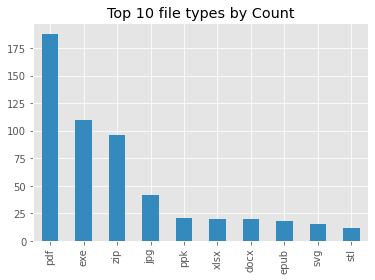

In [8]:
import matplotlib.pyplot as plt

with plt.style.context('ggplot'):
    df['extension'].value_counts()[:10].plot(
        kind='bar', color='C1', title='Top 10 file types by Count');

* At first look there are a lot of .pdf documents, small files with information that might be relevant later and that I would like to keep, I will need to class them so that I can find relevant information when needed. 
* The second highest number is .exe files which will be mostly installers that are probably obsolete now and very likely can just be deleted. 
* On 3rd place rank archives which could contain anything.

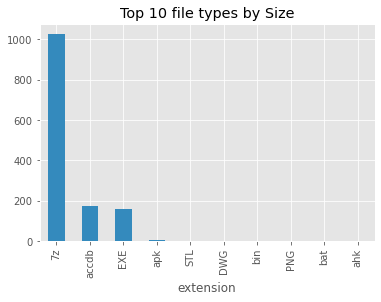

In [9]:
with plt.style.context('ggplot'):
    # Group by extension and sum all sizes for each extension 
    extension_sizes = df.groupby('extension')['sizeMB'].sum()[:10]
    # Sort elements by size
    extension_sizes = extension_sizes.sort_values(ascending=False)
    
    extension_sizes.plot(
        kind='bar', color='C1', title='Top 10 file types by Size');

By size the archives are the main chunk with over 1gb, also appearing a small number of Access databases is taking up space.

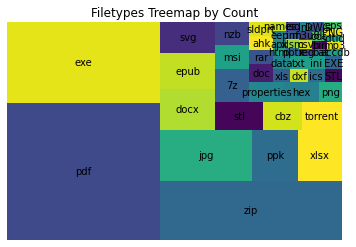

In [10]:
import squarify

# Group by extension and sum all sizes for each extension
extension_sizes = df.groupby('extension')['size'].sum()
# Sort elements by size
extension_sizes = extension_sizes.sort_values(ascending=False)
# Group by extension, count
extension_count = df['extension'].value_counts()

squarify.plot(sizes=extension_count.values, label=extension_count.index.values)
plt.title('Filetypes Treemap by Count')
plt.axis('off');



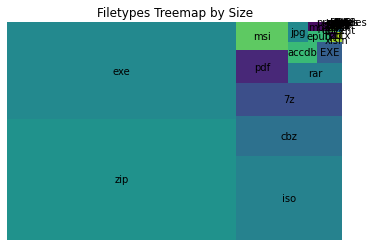

In [11]:
squarify.plot(sizes=extension_sizes.values, label=extension_sizes.index.values)
plt.title('Filetypes Treemap by Size')
plt.axis('off');

***
## Conclusions
There are two scenarios for files in the downloads folder:
* Single use files, which are downloaded then used once and just stay in folder afterwards. Biggest example of this are the .exe files which are both numerous and account for a significant portion of diskspace.
* Files that could be useful in the future but that I just do not give a new home on my drive. Large .iso files and the numerous .pdf files could quickly find a place in my "Documents" folder. 

## Hypotheses
* For the archives (.zip; .7z; .rar) a quick glance at the filename should help identify if it is an installation that can be deleted or actual files. Proposing a handful of those for review from time to time would help organize them into the documents folder without being overwhelming.
* Most of the executables are installers, and even in the rare case of a portable application: if it has not been used more than once we can easily download it again if needed. I suggest we regularly just delete all .exe in the download folder. Maybe give a quick warning befor with how many files we are going to delete.
* The next type of file that is strongly represented in my downloads are pdf files, they are not heavy but numerous. I should decide if it is worth the effort to go over them to delete the useless, or if I can live with just throwing them in my document management system where they will be indexed. The latter could be automatized easily. 

## Next Steps
Now the actual automation script I want to get to should do a number of things:
* count all the .exe and .msi files, display a message informing those will be deleted and wait for user confirmation, then delete all .exe in the Download folder (not in subfolders).
* copy all .pdf files ondo the DMS and then delete them from the Download folder.
* propose a selection of files, maybe 2 archives and 2 to 3 "others", with direct filepath so I can open the file to check and eventually save it elsewhere. After user confirmation the files should be deleted from the Downloads directory.